In [31]:
import radiant as rad
import numpy as np

In [32]:
def get_derivative_label(m):
    if m is None:
        return r"$\phi$"
    elif isinstance(m, int):
        subscript = str(m)
    else:
        subscript = ','.join([f"{i}" for i in m])
    return r"$\frac{\partial \phi}{\partial x_{" + subscript + r"}}$"

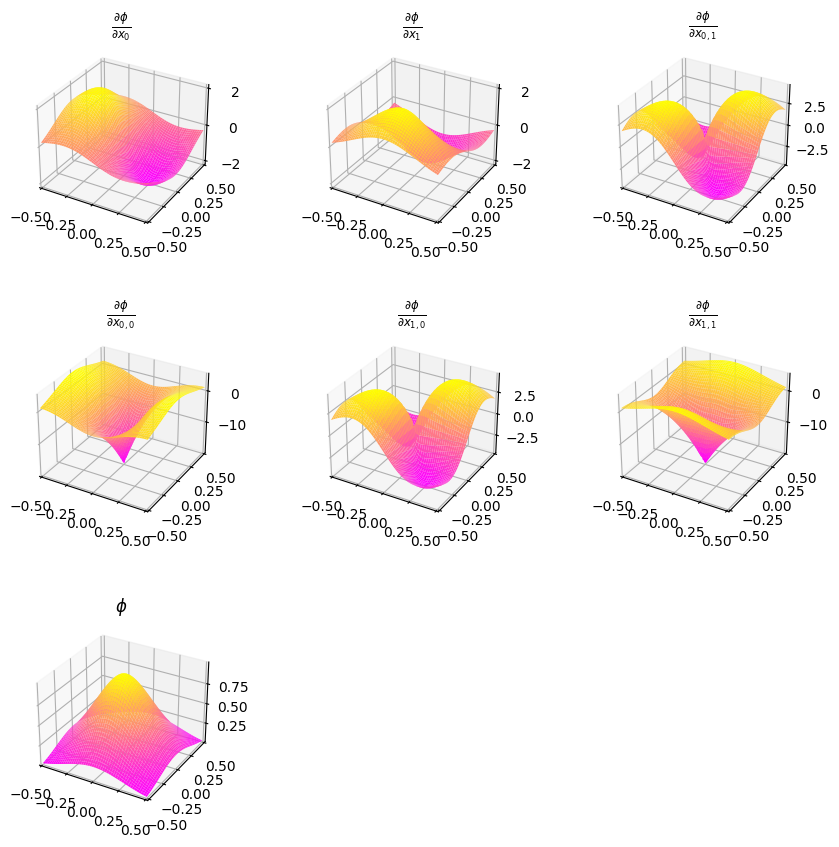

In [33]:
a = -0.5
b = 0.5

d = 2
k = 1
delta = 1.

ranges = ((a, b),) * d
xc = rad.gridn(ranges, 3, flat=True)
phi = rad.Wendland(d, k, delta, xc)[4]

# xc_idx = np.all([np.logical_and(c != a, c != b) for c in xc], axis=0)
xc_idx = np.any([np.logical_or(c == a, c == b) for c in xc], axis=0)

funcs = [lambda *x, m=i: phi(*x, m=m) for i in phi.allowed_derivatives]

rad.plot.spread(
    ranges,
    *funcs,
    n=200,
    ncols=3,
    wspace=0.5,
    hspace=0.5,
    titles=[get_derivative_label(m) for m in phi.allowed_derivatives],
    figsize=(10, 10)
)